# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the Data**

In [2]:
train = pd.read_csv('train_users_2.csv', 
                    parse_dates=['date_account_created', 'timestamp_first_active', 'date_first_booking'])
test = pd.read_csv('test_users.csv',
                  parse_dates=['date_account_created', 'timestamp_first_active'])

In [3]:
countries = pd.read_csv('countries.csv')
sessions = pd.read_csv('sessions.csv')
age_bracket = pd.read_csv('age_gender_bkts.csv')
ss = pd.read_csv('sample_submission_NDF.csv')

# EDA

In [4]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
test.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,2014-07-01 00:00:06,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,2014-07-01 00:00:51,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,2014-07-01 00:01:48,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,2014-07-01 00:02:15,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,2014-07-01 00:03:05,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [6]:
countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [7]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [8]:
age_bracket.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       213451 non-null  object        
 1   date_account_created     213451 non-null  datetime64[ns]
 2   timestamp_first_active   213451 non-null  datetime64[ns]
 3   date_first_booking       88908 non-null   datetime64[ns]
 4   gender                   213451 non-null  object        
 5   age                      125461 non-null  float64       
 6   signup_method            213451 non-null  object        
 7   signup_flow              213451 non-null  int64         
 8   language                 213451 non-null  object        
 9   affiliate_channel        213451 non-null  object        
 10  affiliate_provider       213451 non-null  object        
 11  first_affiliate_tracked  207386 non-null  object        
 12  signup_app      

In [10]:
train.describe()

,age,signup_flow
count,125461.000000,213451.000000
mean,49.668335,3.267387
std,155.666612,7.637707
min,1.000000,0.000000
25%,28.000000,0.000000
50%,34.000000,0.000000
75%,43.000000,0.000000
max,2014.000000,25.000000


In [11]:
# Percentage of null values
train.isna().mean().sort_values(ascending=False)

date_first_booking         0.583473
age                        0.412226
first_affiliate_tracked    0.028414
id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
gender                     0.000000
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.000000
country_destination        0.000000
dtype: float64

In [12]:
# Splitting the columns
cat_cols = ['gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
           'signup_app', 'first_browser']
date_cols = ['date_account_created', 'timestamp_first_active', 'date_first_booking']
num_cols = ['age', 'signup_flow']

# Visualizations

gender


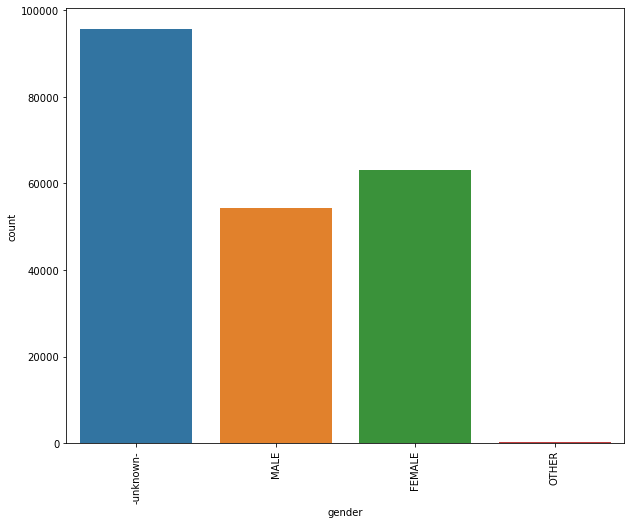

signup_method


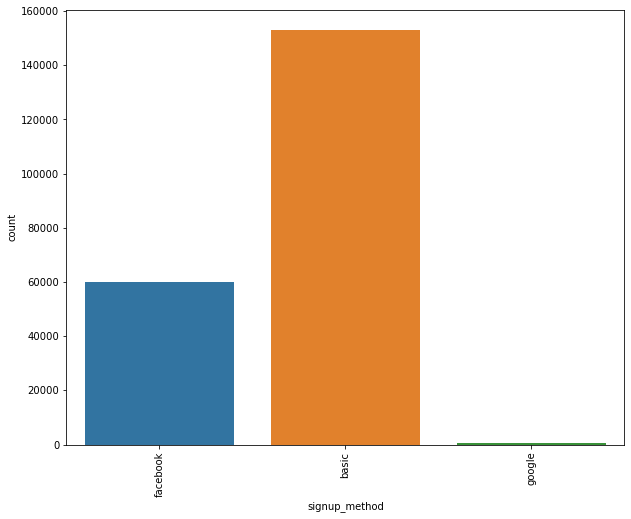

language


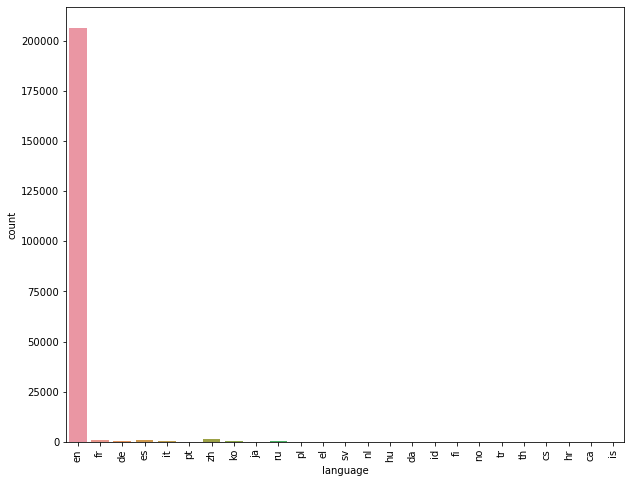

affiliate_channel


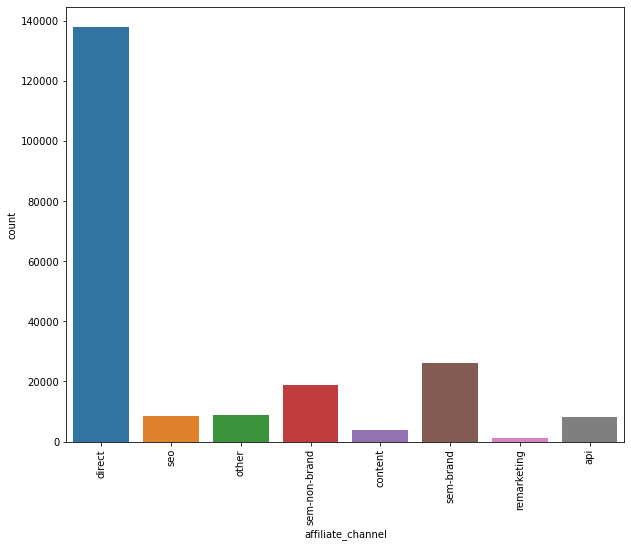

affiliate_provider


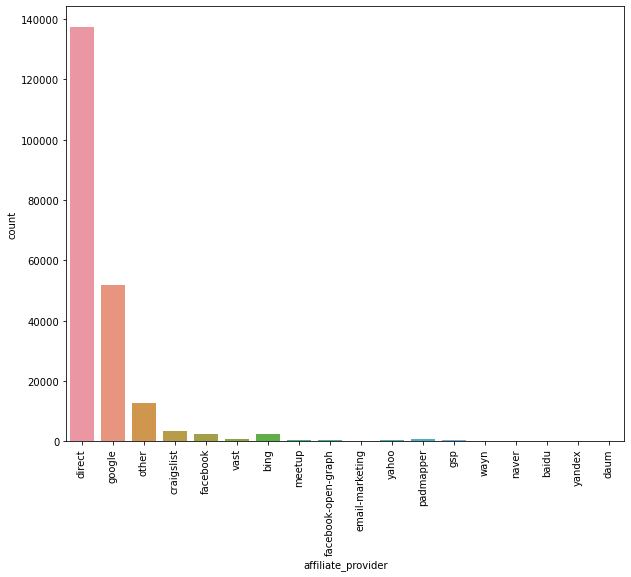

first_affiliate_tracked


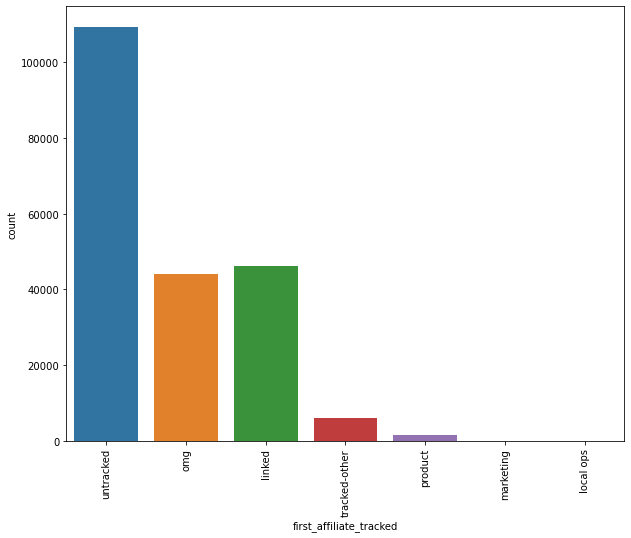

signup_app


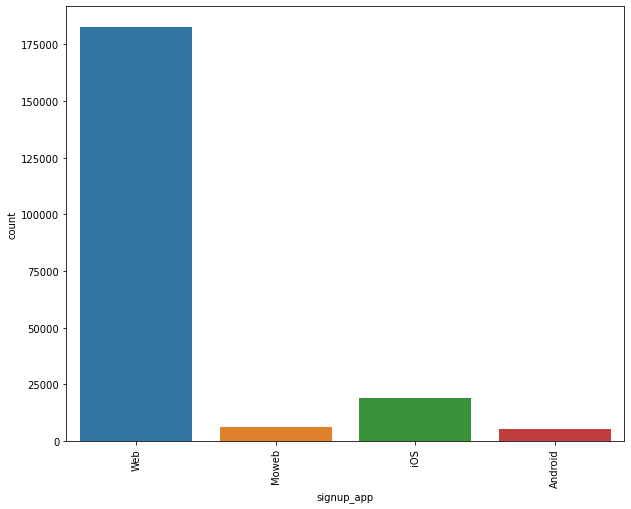

first_browser


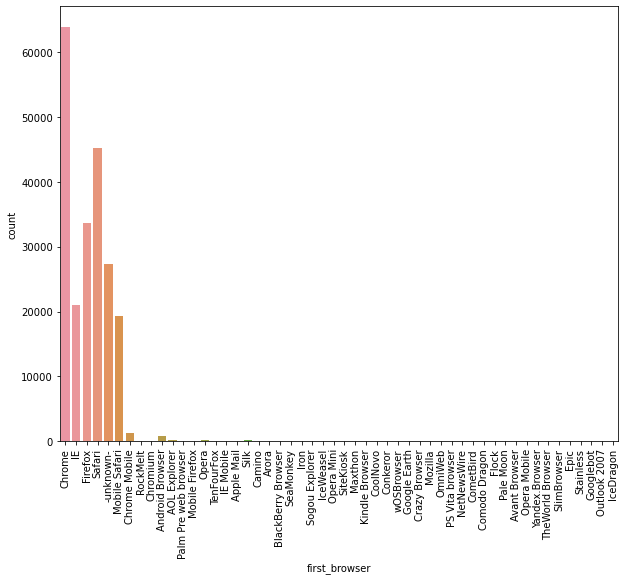

In [13]:
# Plotting categorical features
for cat in cat_cols:
    print(cat)
    plt.figure(figsize=(10,8))
    sns.countplot(x=cat, data=train)
    plt.xticks(rotation=90)
    plt.show()

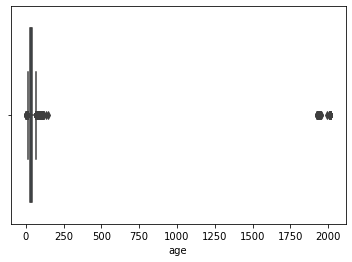

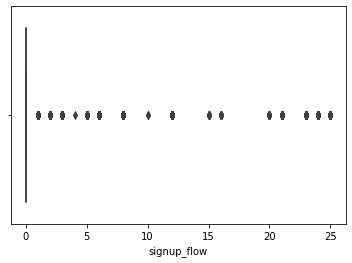

In [14]:
# Plotting numerical columns
for num in num_cols:
    sns.boxplot(x=num, data=train)
    plt.show()

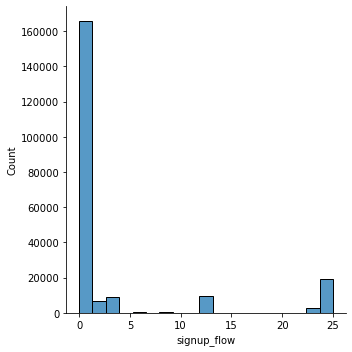

In [15]:
# checking the distribution of signup-flow
sns.displot(train['signup_flow'])

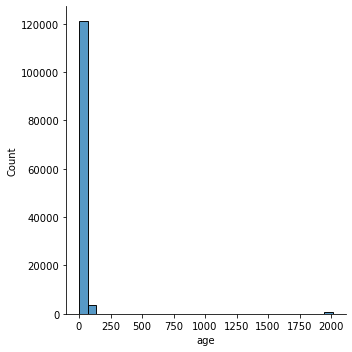

In [16]:
# checking the distribution of age
sns.displot(train['age'], bins=30)

Age column has outliers

Checking the percentage of outliers of Age

In [17]:
# defining the quartiles
q1 = 28
q3 = 43

iqr = 43 - 28 # interquartile range = 15

low_range = q1 - 1.5*iqr
high_range = q3 + 1.5*iqr

# checking the number of observations and percentage of outliers
no_outliers = train[(train['age']<low_range) | (train['age']>high_range)].shape[0]
perc_outliers = no_outliers/train.shape[0] * 100

print(f'The percentage of age outliers is {round(perc_outliers, 4)}%')

The percentage of age outliers is 2.6207%


**Filling the null, outliers of age with the median**

In [18]:
train['age']=np.where((train['age'].isnull())|(train["age"] > 120) |(train["age"] < 10 ), 
                      train['age'].median(), train['age'])

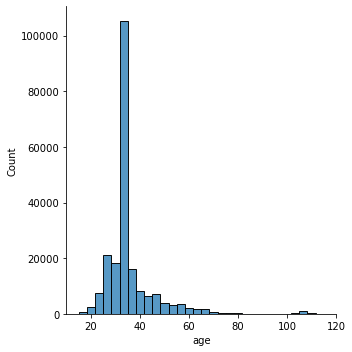

In [19]:
sns.displot(train['age'], bins=30)

**Using foward fill in the 'first_affiliate_tracked' column'**

In [20]:
train['first_affiliate_tracked'] = train['first_affiliate_tracked'].ffill()

# confirming the null values
train['first_affiliate_tracked'].isna().sum()

0

**Extracting date features from the date columns**

In [21]:
for date in date_cols:
    for date_feature in ['month', 'weekday']:
        train[date_feature + date] = getattr(train[date].dt, date_feature)

In [22]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,signup_app,first_device_type,first_browser,country_destination,monthdate_account_created,weekdaydate_account_created,monthtimestamp_first_active,weekdaytimestamp_first_active,monthdate_first_booking,weekdaydate_first_booking
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaT,-unknown-,34.0,facebook,0,en,direct,...,Web,Mac Desktop,Chrome,NDF,6,0,3,3,NaN,NaN
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaT,MALE,38.0,facebook,0,en,seo,...,Web,Mac Desktop,Chrome,NDF,5,2,5,5,NaN,NaN
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,Web,Windows Desktop,IE,US,9,1,6,1,8.0,0.0
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,Web,Mac Desktop,Firefox,other,12,0,10,5,9.0,5.0
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,Web,Mac Desktop,Chrome,US,9,1,12,1,2.0,3.0


In [23]:
# Transforming the weekday_account_created column into their respective days
day_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

train['weekdaydate_account_created'] = train['weekdaydate_account_created'].map(day_map)
train['weekdaydate_first_booking'] = train['weekdaydate_first_booking'].map(day_map)
train['weekdaytimestamp_first_active'] = train['weekdaytimestamp_first_active'].map(day_map)

In [24]:
train[['weekdaydate_account_created', 'weekdaydate_first_booking']].head()

,weekdaydate_account_created,weekdaydate_first_booking
0,Mon,NaN
1,Wed,NaN
2,Tue,Mon
3,Mon,Sat
4,Tue,Thur


**Exploring the data for people who made a booking**

<AxesSubplot:xlabel='weekdaydate_first_booking', ylabel='count'>

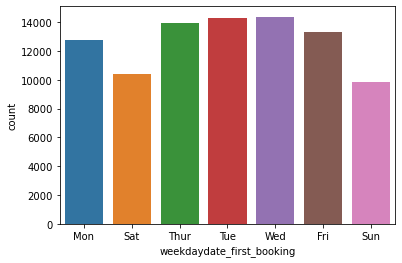

In [25]:
sns.countplot(x='weekdaydate_first_booking', data=train)

<AxesSubplot:xlabel='monthdate_first_booking', ylabel='count'>

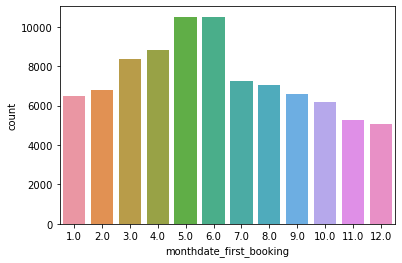

In [26]:
sns.countplot(x='monthdate_first_booking', data=train)

**Creating a feature specifing if a user made a booking**

In [27]:
def booking(destination):
    
    if destination == 'NDF':
        return False
    else:
        return True

In [28]:
train['Booking'] = train['country_destination'].apply(booking)

In [29]:
train['Booking'].value_counts()

False    124543
True      88908
Name: Booking, dtype: int64

<AxesSubplot:xlabel='Booking', ylabel='age'>

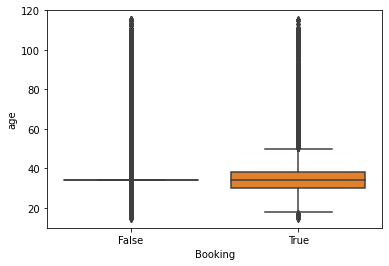

In [30]:
sns.boxplot(x='Booking', y='age', data=train)

In [31]:
train.groupby('Booking')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
Booking,,,,,,,,
False,124543.0,35.729507,9.719446,15.0,34.0,34.0,34.0,115.0
True,88908.0,36.380877,12.106560,15.0,30.0,34.0,38.0,115.0


In [32]:
train.groupby('country_destination')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
country_destination,,,,,,,,
AU,539.0,37.450835,12.540896,18.0,30.0,34.0,40.0,110.0
CA,1428.0,36.986695,12.076338,18.0,31.0,34.0,39.0,105.0
DE,1061.0,36.640905,12.412037,18.0,30.0,34.0,40.0,105.0
ES,2249.0,35.373055,11.788317,18.0,29.0,34.0,37.0,105.0
FR,5023.0,36.969739,11.988042,18.0,31.0,34.0,39.0,110.0
GB,2324.0,37.831325,13.327070,17.0,31.0,34.0,41.0,110.0
IT,2835.0,36.895591,12.890904,18.0,31.0,34.0,38.0,110.0
NDF,124543.0,35.729507,9.719446,15.0,34.0,34.0,34.0,115.0
NL,762.0,36.139108,12.580738,18.0,29.0,34.0,38.0,105.0


gender


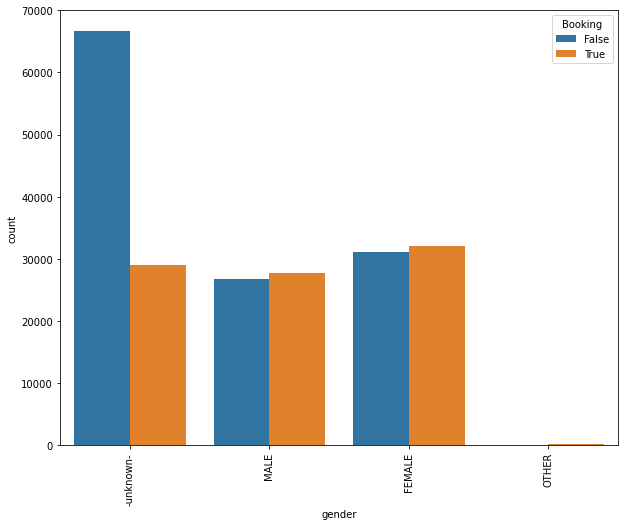

signup_method


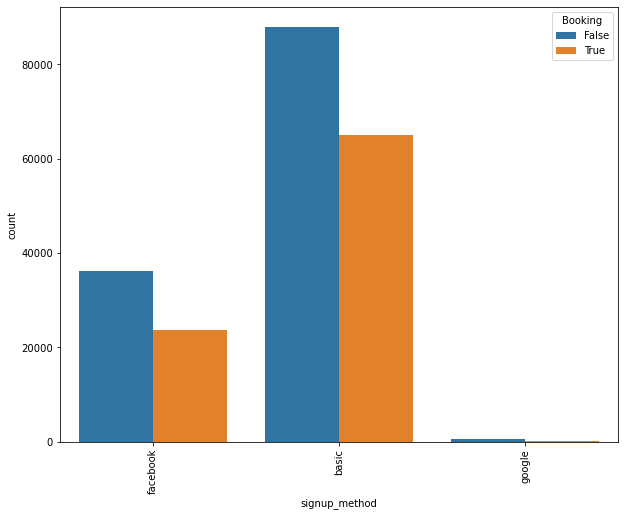

language


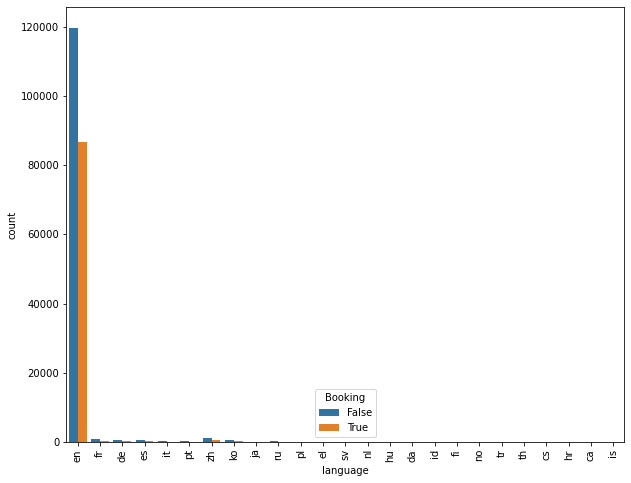

affiliate_channel


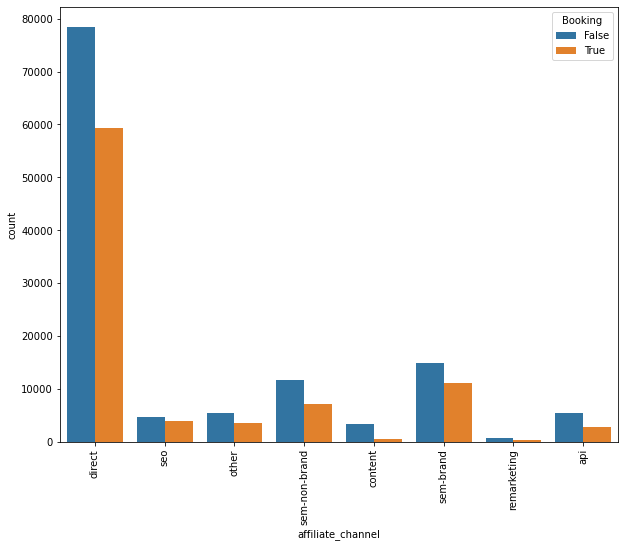

affiliate_provider


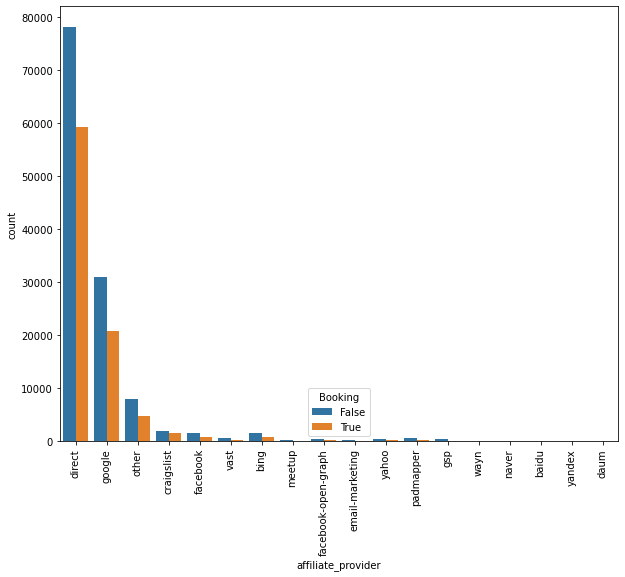

first_affiliate_tracked


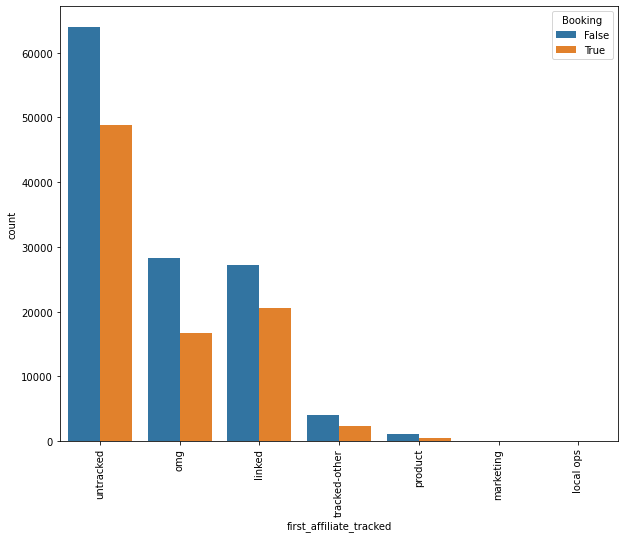

signup_app


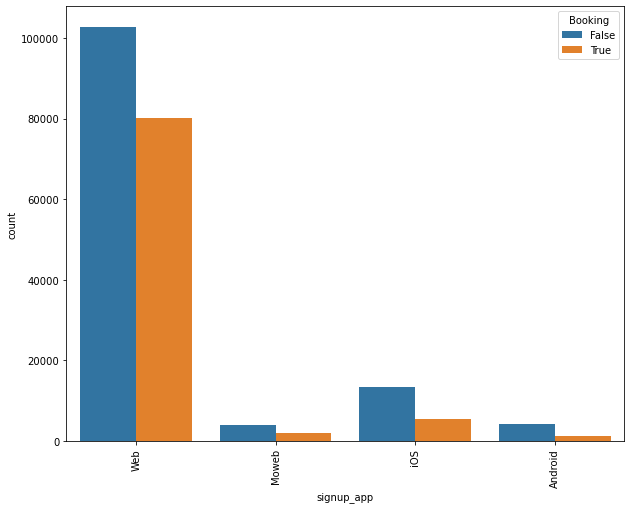

first_browser


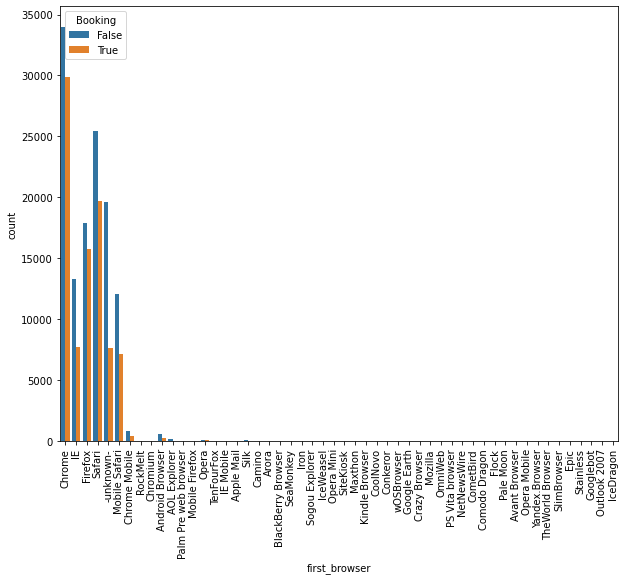

In [33]:
for cat in cat_cols:
    print(cat)
    plt.figure(figsize=(10,8))
    sns.countplot(x=cat, data=train, hue='Booking')
    plt.xticks(rotation=90)
    plt.show()

In [34]:
train.nunique()

id                               213451
date_account_created               1634
timestamp_first_active           213451
date_first_booking                 1976
gender                                4
age                                 100
signup_method                         3
signup_flow                          17
language                             25
affiliate_channel                     8
affiliate_provider                   18
first_affiliate_tracked               7
signup_app                            4
first_device_type                     9
first_browser                        52
country_destination                  12
monthdate_account_created            12
weekdaydate_account_created           7
monthtimestamp_first_active          12
weekdaytimestamp_first_active         7
monthdate_first_booking              12
weekdaydate_first_booking             7
Booking                               2
dtype: int64

**Grouping the columns that have high number of classes**

Starting with the language

In [35]:
train['language'].value_counts()

en    206314
zh      1632
fr      1172
es       915
ko       747
de       732
it       514
ru       389
pt       240
ja       225
sv       122
nl        97
tr        64
da        58
pl        54
cs        32
no        30
el        24
th        24
id        22
hu        18
fi        14
ca         5
is         5
hr         2
Name: language, dtype: int64

In [36]:
language = list(train['language'].value_counts().index[:11])
language

['en', 'zh', 'fr', 'es', 'ko', 'de', 'it', 'ru', 'pt', 'ja', 'sv']

Putting all other languages in their own category 'other'

In [37]:
train['new_language'] = train['language'].apply(lambda x: x if x in language else 'other')

train['new_language'].value_counts()

en       206314
zh         1632
fr         1172
es          915
ko          747
de          732
it          514
other       449
ru          389
pt          240
ja          225
sv          122
Name: new_language, dtype: int64

Affiliate Provider

In [38]:
# checking the percentage of each class in the affiliate_provider
(train['affiliate_provider'].value_counts() / train.shape[0]) * 100

direct                 64.382926
google                 24.217736
other                   5.879101
craigslist              1.626134
bing                    1.090648
facebook                1.064881
vast                    0.388380
padmapper               0.359802
facebook-open-graph     0.255328
yahoo                   0.232372
gsp                     0.212227
meetup                  0.162567
email-marketing         0.077770
naver                   0.024362
baidu                   0.013586
yandex                  0.007964
wayn                    0.003748
daum                    0.000468
Name: affiliate_provider, dtype: float64

Classes in affiliate_provider that have lower than 1% will be put in their 'other' category

In [39]:
aff_provider = list(train['affiliate_provider'].value_counts()[:6].index)
aff_provider

['direct', 'google', 'other', 'craigslist', 'bing', 'facebook']

In [40]:
train['new_affiliate_provider'] = train['affiliate_provider'].apply(lambda x: x if x in aff_provider else 'other')
train['new_affiliate_provider'].value_counts()

direct        137426
google         51693
other          16260
craigslist      3471
bing            2328
facebook        2273
Name: new_affiliate_provider, dtype: int64

First Browser

In [41]:
# checking the percentage each browser has on the total dataframe
train['first_browser'].value_counts() / train.shape[0] * 100

Chrome                  29.910846
Safari                  21.161297
Firefox                 15.767085
-unknown-               12.773892
IE                       9.870181
Mobile Safari            9.029707
Chrome Mobile            0.594984
Android Browser          0.398686
AOL Explorer             0.114780
Opera                    0.088076
Silk                     0.058093
Chromium                 0.034200
BlackBerry Browser       0.024830
Maxthon                  0.021551
IE Mobile                0.016866
Apple Mail               0.016866
Sogou Explorer           0.015460
Mobile Firefox           0.014055
SiteKiosk                0.011244
RockMelt                 0.011244
Iron                     0.007964
IceWeasel                0.006090
Pale Moon                0.005622
SeaMonkey                0.005153
CometBird                0.005153
Yandex.Browser           0.005153
Camino                   0.004216
TenFourFox               0.003748
CoolNovo                 0.002811
wOSBrowser    

Browsers that have less than 1% will be put in their own category

In [42]:
browser = list(train['first_browser'].value_counts()[:6].index)
browser

['Chrome', 'Safari', 'Firefox', '-unknown-', 'IE', 'Mobile Safari']

In [43]:
train['new_first_browser'] = train['first_browser'].apply(lambda x: x if x in browser else 'other')
train['new_first_browser'].value_counts()

Chrome           63845
Safari           45169
Firefox          33655
-unknown-        27266
IE               21068
Mobile Safari    19274
other             3174
Name: new_first_browser, dtype: int64

**Dropping the date_first_booking column**

In [44]:
train = train.drop('date_first_booking', axis=1)

**Grabbing the relevant columns**

In [45]:
train.columns

Index(['id', 'date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'country_destination',
       'monthdate_account_created', 'weekdaydate_account_created',
       'monthtimestamp_first_active', 'weekdaytimestamp_first_active',
       'monthdate_first_booking', 'weekdaydate_first_booking', 'Booking',
       'new_language', 'new_affiliate_provider', 'new_first_browser'],
      dtype='object')

In [46]:
model_data = train[['gender', 'age', 'signup_method', 'signup_flow','new_language', 
                    'affiliate_channel', 'new_affiliate_provider','first_affiliate_tracked', 
                    'signup_app', 'first_device_type','new_first_browser','country_destination',
                    'monthdate_account_created', 'weekdaydate_account_created',
                    'monthtimestamp_first_active', 'weekdaytimestamp_first_active']].copy(deep=True)

model_data.head()

,gender,age,signup_method,signup_flow,new_language,affiliate_channel,new_affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,new_first_browser,country_destination,monthdate_account_created,weekdaydate_account_created,monthtimestamp_first_active,weekdaytimestamp_first_active
0,-unknown-,34.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,6,Mon,3,Thur
1,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,5,Wed,5,Sat
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,9,Tue,6,Tue
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,12,Mon,10,Sat
4,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,9,Tue,12,Tue


Changing the months columns to their respective str names

In [47]:
import calendar

In [48]:
for month in ['monthdate_account_created', 'monthtimestamp_first_active']:
    model_data[month] = model_data[month].apply(lambda x: calendar.month_abbr[x])

In [49]:
model_data.head()

,gender,age,signup_method,signup_flow,new_language,affiliate_channel,new_affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,new_first_browser,country_destination,monthdate_account_created,weekdaydate_account_created,monthtimestamp_first_active,weekdaytimestamp_first_active
0,-unknown-,34.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,Jun,Mon,Mar,Thur
1,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,May,Wed,May,Sat
2,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,Sep,Tue,Jun,Tue
3,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,Dec,Mon,Oct,Sat
4,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,Sep,Tue,Dec,Tue


In [50]:
model_data['weekdaytimestamp_first_active'] = model_data['weekdaytimestamp_first_active'].map(day_map)

**One Hot Encoding**

In [51]:
X = model_data.drop('country_destination', axis=1)
y = model_data['country_destination']

In [52]:
X = pd.get_dummies(X, drop_first=True)

X.head()

,age,signup_flow,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_facebook,signup_method_google,new_language_en,new_language_es,new_language_fr,...,monthtimestamp_first_active_Dec,monthtimestamp_first_active_Feb,monthtimestamp_first_active_Jan,monthtimestamp_first_active_Jul,monthtimestamp_first_active_Jun,monthtimestamp_first_active_Mar,monthtimestamp_first_active_May,monthtimestamp_first_active_Nov,monthtimestamp_first_active_Oct,monthtimestamp_first_active_Sep
0,34.0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,38.0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,56.0,3,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,42.0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,41.0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [53]:
# Encoding the target column
target_map = {'NDF': 0, 'US': 1, 'other': 2, 'FR': 3, 'IT': 4, 
            'GB': 5, 'ES': 6, 'CA': 7, 'DE': 8, 'NL': 9, 'AU': 10, 'PT': 11}

y = y.map(target_map)

# MACHINE LEARNING

In [54]:
from sklearn.model_selection import train_test_split

In [62]:
from sklearn.preprocessing import LabelBinarizer,LabelEncoder

In [57]:
from sklearn.metrics import classification_report, ndcg_score, make_scorer

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=101)

In [63]:
def dcg_score(y_true, y_score, k=5):
    
    """Discounted cumulative gain (DCG) at rank K.

    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (true relevance labels).
    y_score : array, shape = [n_samples, n_classes]
        Predicted scores.
    k : int
        Rank.

    Returns
    -------
    score : float
    """
    
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)


def ndcg_score(ground_truth, predictions, k=5):
    
    """Normalized discounted cumulative gain (NDCG) at rank K.

    Normalized Discounted Cumulative Gain (NDCG) measures the performance of a
    recommendation system based on the graded relevance of the recommended
    entities. It varies from 0.0 to 1.0, with 1.0 representing the ideal
    ranking of the entities.

    Parameters
    ----------
    ground_truth : array, shape = [n_samples]
        Ground truth (true labels represended as integers).
    predictions : array, shape = [n_samples, n_classes]
        Predicted probabilities.
    k : int
        Rank.

    Returns
    -------
    score : float

    Example
    -------
    >>> ground_truth = [1, 0, 2]
    >>> predictions = [[0.15, 0.55, 0.2], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    1.0
    >>> predictions = [[0.9, 0.5, 0.8], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    0.6666666666
    """
    
    lb = LabelBinarizer()
    lb.fit(range(predictions.shape[1] + 1))
    T = lb.transform(ground_truth)

    scores = []

    # Iterate over each y_true and compute the DCG score
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        score = float(actual) / float(best)
        scores.append(score)

    return np.mean(scores)


# NDCG Scorer function
ndcg_scorer = make_scorer(ndcg_score, needs_proba=True, k=5)

**Starting with Random Forest model**

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
rfc_model = RandomForestClassifier().fit(X_train, y_train)

In [64]:
rfc_pred = rfc_model.predict_proba(X_test)

# checking how well the model performs
ndcg_score(y, rfc_pred, k=5)

0.7136502641202368

In [108]:
rfc_pred

array([[0.83518299, 0.12237084, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32904762, 0.        , 0.53095238, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.34      , 0.11      , 0.04      , ..., 0.        , 0.        ,
        0.        ],
       [0.67666667, 0.23333333, 0.05      , ..., 0.        , 0.        ,
        0.        ],
       [0.19      , 0.62666667, 0.15333333, ..., 0.        , 0.01      ,
        0.        ]])

**Checking xgboost**

In [65]:
from xgboost import XGBClassifier

C:\Users\Maish\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [66]:
xg_model = XGBClassifier().fit(X_train, y_train)

C:\Users\Maish\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Maish\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[19:19:47] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [67]:
xg_pred = xg_model.predict_proba(X_test)

# checking how well the model performs
ndcg_score(y_test, xg_pred, k=5)

0.8238845718046796